# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


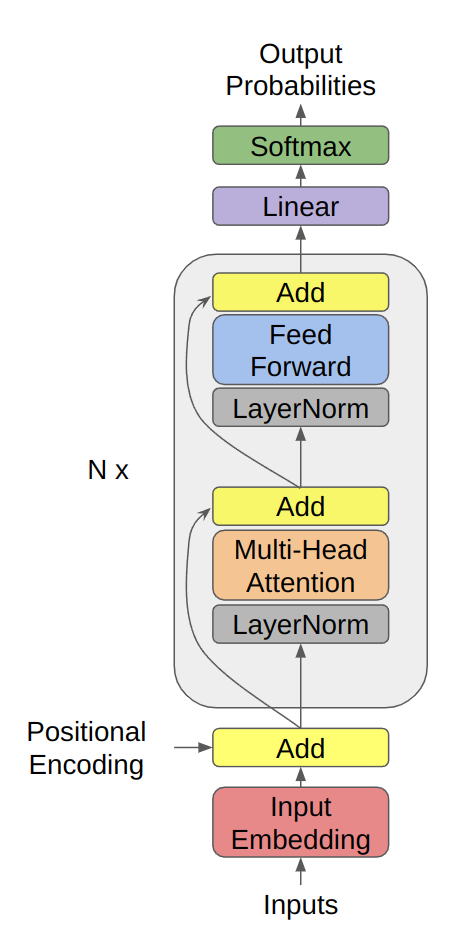

# Tools

In [224]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [225]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [226]:
import string

Edge = namedtuple("Edge", "to token prob")

In [227]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [228]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [229]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [230]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [231]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [232]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [233]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 1, 2, 6, 1, 2, 6, 1, 9, 5, 6, 1, 9, 0, 2, 6, 1, 2, 6, 1, 9, 5, 6, 1,
        9, 5, 3, 8, 0, 2, 6, 1, 2, 6, 1, 2, 6, 1, 9, 5, 3, 8, 0, 2, 6, 1, 9, 5,
        3, 8, 0, 2, 6, 1, 9, 0, 2, 6, 7, 7, 7, 7, 7, 7])
tensor([0, 6, 2, 3, 9, 0, 6, 2, 3, 4, 1, 5, 7, 8, 8, 9, 0, 6, 2, 3, 9, 0, 6, 2,
        3, 9, 0, 1, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 0, 6, 2, 3, 9, 0, 6,
        7, 4, 1, 5, 7, 4, 1, 5, 7, 8, 8, 8, 8, 8, 8, 8])
tensor([0, 4, 8, 1, 9, 5, 6, 7, 3, 2, 0, 4, 8, 1, 2, 0, 4, 8, 1, 9, 0, 1, 9, 5,
        6, 7, 3, 2, 0, 4, 8, 9, 5, 6, 7, 8, 1, 9, 5, 6, 7, 3, 2, 0, 4, 5, 6, 7,
        3, 4, 8, 1, 2, 0, 4, 8, 1, 9, 0, 4, 8, 1, 9, 5])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 7, 5, 1, 2, 4, 6, 3, 9, 8, 2, 4, 6, 3, 4, 6, 3,
        9, 8, 2, 4, 6, 3, 9, 8, 2, 4, 5, 1, 7, 5, 1, 7, 5, 1, 7, 5, 1, 7, 5, 1,
        7, 5, 1, 7, 8, 9, 0, 0, 1, 7, 8, 9, 8, 2, 4, 5])
tensor([0, 5, 3, 9, 7, 8, 8, 8, 9, 7, 8, 9, 7, 6, 4, 5, 3, 9, 7, 6, 4, 5, 3, 9,
        7, 6, 4, 2, 3, 4, 2, 1, 0, 5, 3, 9, 7, 6, 4,

In [234]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

[0, 6, 8, 9, 9, 9, 9, 0, 6, 8, 7, 0, 6, 8, 7, 8, 7, 8, 9, 0, 1, 4, 2, 5, 1, 4, 2, 5, 1, 4, 5, 1, 4, 2, 5, 1, 4, 5, 1, 4, 2, 3, 3, 3, 3, 3, 4, 2, 5, 1, 4, 2, 5, 1, 4, 2, 5, 1, 4, 5, 1, 4, 5, 1]


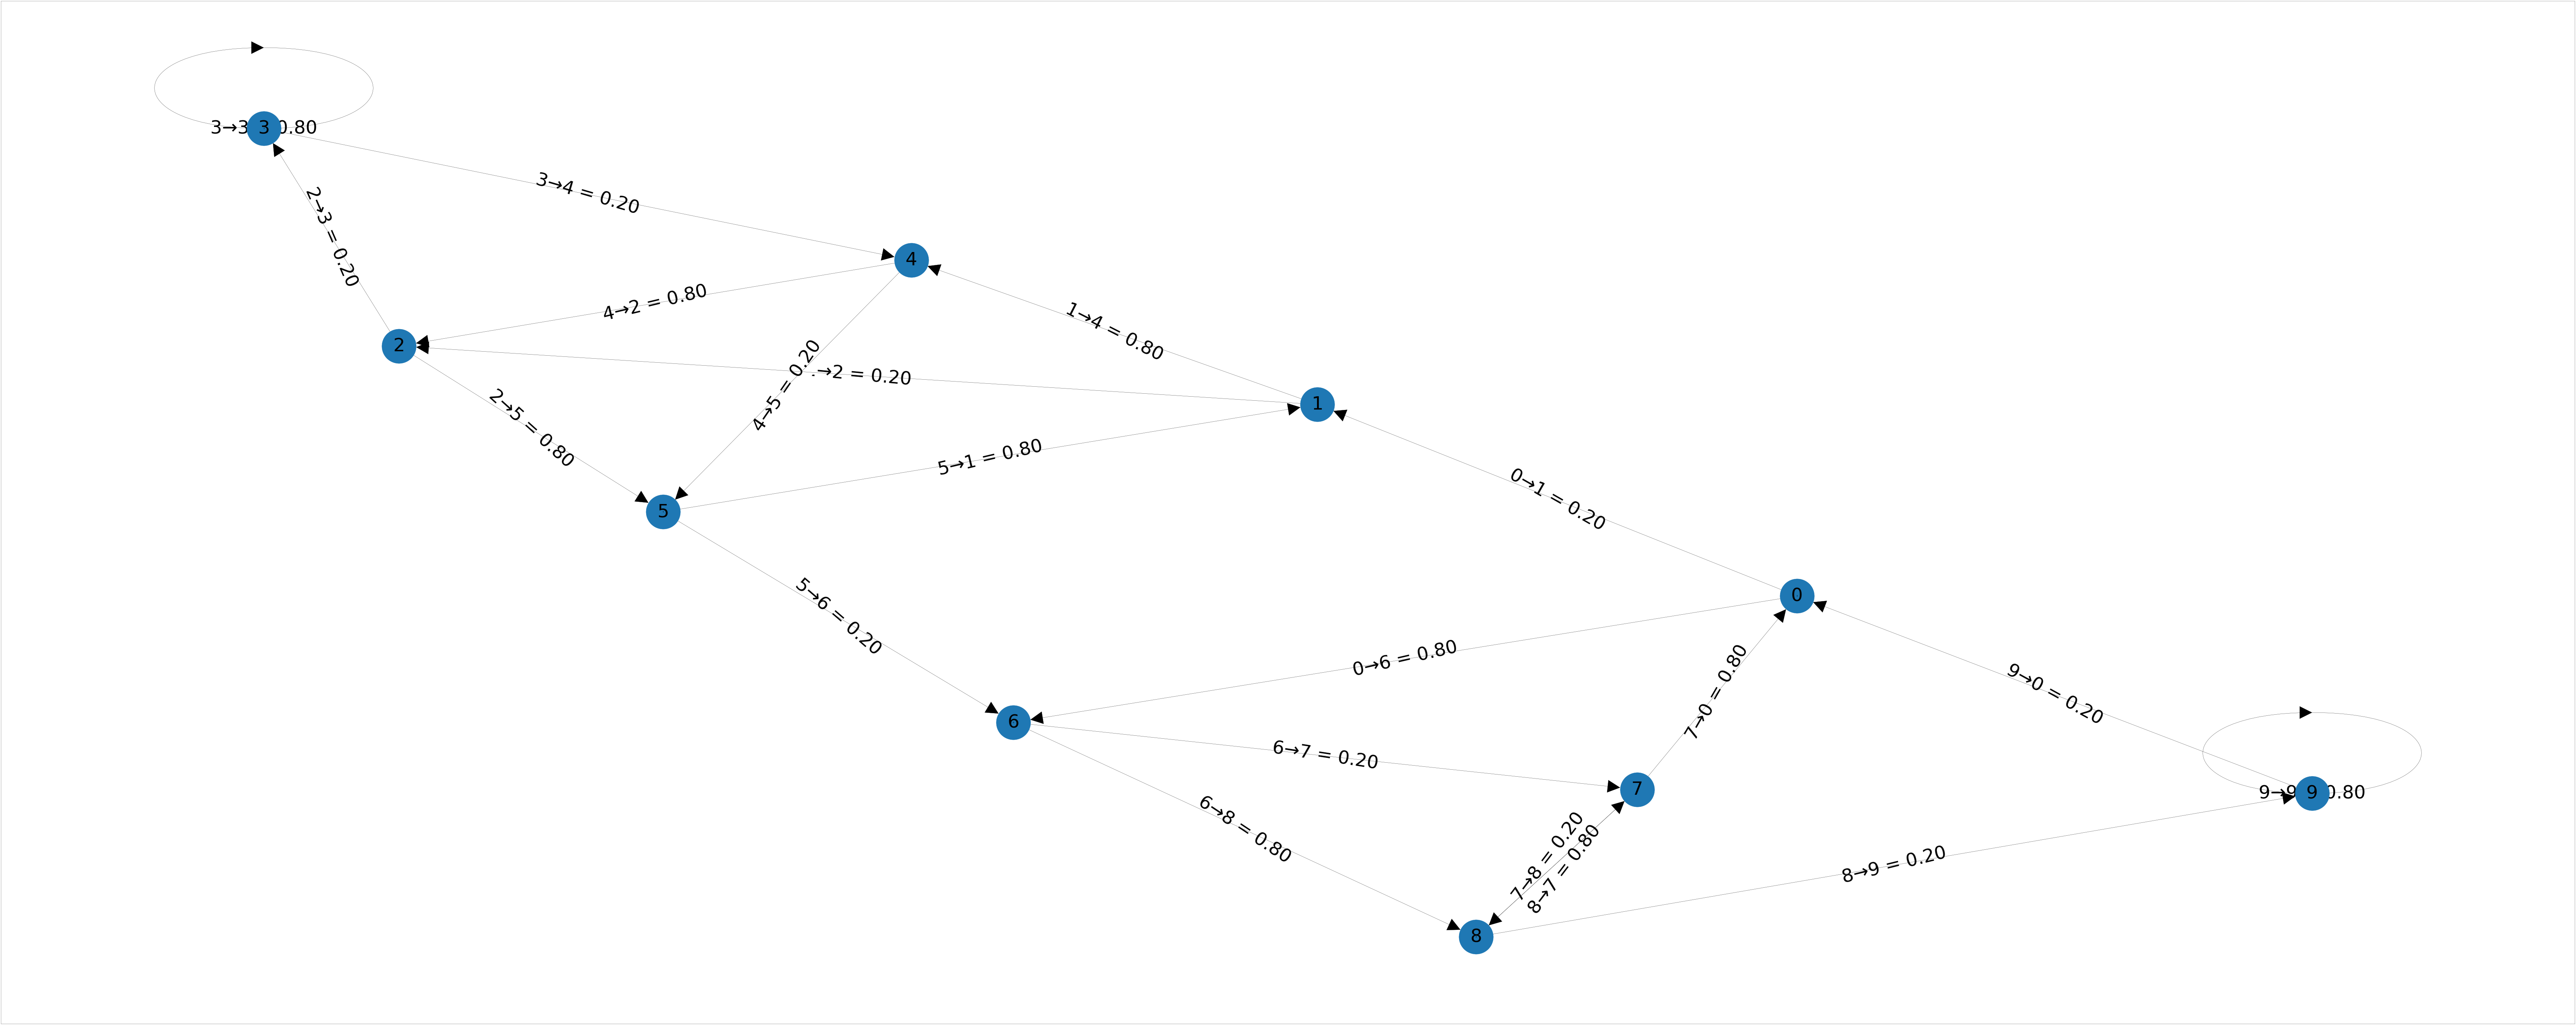

In [235]:
graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [236]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [237]:
def stable_softmax(x, dim):
    pass
    return None


# test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
# assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
#                      stable_softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-1),
#                      torch.nn.functional.softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-2),
#                      torch.nn.functional.softmax(test_input, dim=-2)).all()
# assert torch.isclose(stable_softmax(test_input, dim=0),
#                      torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [238]:
import math

MHACache = namedtuple("MHACache", "k v")


class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
      super().__init__()
      # TODO
      self.d_model = d_model
      self.num_heads = num_heads
      self.d_head = d_head

      self.q_weight = torch.nn.Linear(d_model, num_heads * d_head)
      self.k_weight = torch.nn.Linear(d_model, num_heads * d_head)
      self.v_weight = torch.nn.Linear(d_model, num_heads * d_head)
      self.final_weight = torch.nn.Linear(num_heads * d_head, d_model)
      self.mask_val = -math.inf

    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):
      """
        x input of shape (seq, batch_size, d_model).

        cache is a MHACache object consisting of keys and values
          of shape (seq', batch_size, head, d_head)

      Returns the result of the attention computation along with the updated
      cache. The attention is calculated separately for each head. The attention
      mechanism used is decoder-style, which means that an element can only
      attend to itself and elements that precede it (including elements in the
      cache). The new cache is created by extending the old cache with the new
      keys and values computed for each head of x.
      """
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model

      assert len(cache.k.shape) == 4  # seq', batch, head, d_head
      assert cache.k.shape == cache.v.shape
      assert cache.k.shape[1] == x.shape[1]
      assert cache.k.shape[2] == self.num_heads
      assert cache.k.shape[3] == self.d_head
      # TODO

      q = self.q_weight(x)
      k = self.k_weight(x)
      v = self.v_weight(x)

      # [seq, batch_size, head, d_head]
      q = q.view(x.shape[0], x.shape[1], self.num_heads, self.d_head)
      k = k.view(x.shape[0], x.shape[1], self.num_heads, self.d_head)
      v = v.view(x.shape[0], x.shape[1], self.num_heads, self.d_head)

      k = torch.cat((cache.k, k))
      v = torch.cat((cache.v, v))
      new_cache = MHACache(k=k.detach(), v=v.detach())

      # q -> [batch_size, head, seq, d_head]
      # k -> [batch_size, head, d_head, seq]
      q = q.permute((1, 2, 0, 3))
      k = k.permute((1, 2, 3, 0))
      scores = (q @ k) / math.sqrt(self.d_head)

      # If scores.shape[-2] == 1 then this is generation, or one length sequence, 
      # mask is not useful either way, so we can skip calculating it.
      if scores.shape[-2] != 1: 
        # This way of generating mask works only if scores is sqare matrix (scores.shape[-2] == scores.shape[-1])
        # That's why the above 'if' is necessary for text generation to work.
        # During training and testing scores is always square
        mask = torch.ones(scores.shape[-2], scores.shape[-1]).to(DEVICE)
        mask = torch.triu(mask, diagonal=1)
        mask = mask == 1
        scores = scores.masked_fill(mask, self.mask_val)

      v = v.permute((1, 2, 0, 3))
      
      scores = torch.nn.functional.softmax(scores, dim=3) @ v
      scores = scores.permute((2, 0, 1, 3))
      
      res = scores.reshape((x.shape[0], x.shape[1], self.d_head * self.num_heads))
      res = self.final_weight(res)
      
      assert res.shape == x.shape
      return res, new_cache

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [239]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
      super().__init__()
      # TODO
      self.d_model = d_model
      self.d_ff = d_ff
      self.block = torch.nn.Sequential(
        torch.nn.Linear(d_model, d_ff),
        torch.nn.ReLU(),
        torch.nn.Linear(d_ff, d_model)
      )

    def forward(self, x):
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      # TODO

      x = self.block(x)

      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [240]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
      super().__init__()
      self.norm1 = torch.nn.LayerNorm(d_model)
      self.attention = MultiHeadAttention(d_model, num_heads, d_head)

      self.norm2 = torch.nn.LayerNorm(d_model)
      self.ff = FeedForward(d_model, d_ff)

    def get_empty_cache(self, batch_size):
        return self.attention.get_empty_cache(batch_size)

    def forward(self, x, cache):
      y = self.norm1(x)
      y, new_cache = self.attention(y, cache)

      x = y + x

      y = self.norm2(x)
      y = self.ff(y)

      x = x + y

      cache = new_cache
      return x, cache

Implement positional encoding.

In [241]:
def get_positional_encoding(seqlen, hiddendim):
  """
  Returns a matrix P of shape (seqlen, hiddendim) where
  P[i] should be added to the ith element of the input sequence 
  as positional encoding.
  """
  # TODO: implement positional encoding

  def calc_inner(pos_tensor, i_tensor):
    x =  1 / np.power(10000, 2 * i_tensor / hiddendim)
    return pos_tensor * x

  inners = calc_inner(np.arange(seqlen).reshape([-1,1]), np.arange(hiddendim).reshape([1, -1]))

  positional_encoding = np.empty((seqlen, hiddendim))
  positional_encoding[:,::2] = np.sin(inners[:, ::2])
  positional_encoding[:, 1::2] = np.cos(inners[:, 1::2])

  return torch.tensor(positional_encoding, dtype=torch.float,
                      device=DEVICE)

Decoder is already implemented below.

In [242]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        if POSITIONAL:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)

        return torch.distributions.Categorical(logits=x), new_cache


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [243]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

In [244]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")


Train the model on the dataset.

In [245]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
train(model, TRAIN_LOADER, TEST_LOADER, 11)

EPOCH 0 loss:2.1652989115896104 acc:0.3143
EPOCH 1 loss:1.9278852788707879 acc:0.4375
EPOCH 2 loss:1.10663673394843 acc:0.7075
EPOCH 3 loss:0.8124202784103683 acc:0.7153
EPOCH 4 loss:0.7795828860017318 acc:0.7158
EPOCH 5 loss:0.7618070222154448 acc:0.7163
EPOCH 6 loss:0.7505849033971376 acc:0.7187
EPOCH 7 loss:0.741390538366535 acc:0.7199
EPOCH 8 loss:0.7336419820785522 acc:0.7211
EPOCH 9 loss:0.7272179285182229 acc:0.7220
EPOCH 10 loss:0.7220590024054805 acc:0.7226


As expected model trains very quickly and achieves around 70% accuracy after just a couple of epochs. It is obvious, given the way that datasets are generated, that it is impossible to achieve above 80% accuracy, and it is expected, that model will take some time to learn the pattern in given sequence, and because of that it cannot achieve the theoretical limit of 80% (this can be seen later, when accuracy per position will be discussed).

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [246]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

EPOCH 0 loss:2.5207715034484863 acc:0.0958
EPOCH 1 loss:2.45320463180542 acc:0.0997
EPOCH 2 loss:2.384291410446167 acc:0.0991
EPOCH 3 loss:2.350170135498047 acc:0.0931
EPOCH 4 loss:2.3265907764434814 acc:0.0981
EPOCH 5 loss:2.3270723819732666 acc:0.1008
EPOCH 6 loss:2.325192928314209 acc:0.0977
EPOCH 7 loss:2.317584991455078 acc:0.1000
EPOCH 8 loss:2.309124231338501 acc:0.1036
EPOCH 9 loss:2.3036694526672363 acc:0.1050
EPOCH 10 loss:2.3007872104644775 acc:0.1034
EPOCH 11 loss:2.298480272293091 acc:0.1048
EPOCH 12 loss:2.2948787212371826 acc:0.1047
EPOCH 13 loss:2.2894089221954346 acc:0.1067
EPOCH 14 loss:2.284426212310791 acc:0.1052
EPOCH 15 loss:2.2824482917785645 acc:0.1058
EPOCH 16 loss:2.281738042831421 acc:0.1031
EPOCH 17 loss:2.279938220977783 acc:0.1027
EPOCH 18 loss:2.2773430347442627 acc:0.1039
EPOCH 19 loss:2.2748501300811768 acc:0.1008
EPOCH 20 loss:2.272481679916382 acc:0.0978
EPOCH 21 loss:2.26993989944458 acc:0.0997
EPOCH 22 loss:2.2674129009246826 acc:0.0983
EPOCH 23 los

As expected on totally random dataset model achieves around 10% accuracy. This way we see, that model doesn't 'cheat' by looking at tokens beyond current position.

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [247]:
#TODO
import random
x, _ = random.choice(TEST_DATASET)
print("input sequence:", x.tolist(), "\n")
x = x.to(DEVICE).view(x.shape[0], -1)
model.eval()
dist, _ = model(x, model.get_empty_cache(x.shape[1]))
for in_token, out_token in zip(x,dist.probs.squeeze()):
    print("input token:", in_token.item(), "\nprobability distribution:", ["{0:0.2f}".format(prob.item()) for prob in out_token], "\n")

input sequence: [0, 0, 0, 0, 1, 6, 2, 4, 8, 3, 4, 8, 9, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 3, 1, 6, 2, 3, 1, 6, 2, 4, 5, 9, 5, 9, 0, 0, 0, 0, 0, 0, 0, 1, 6, 2, 4, 8, 3, 1, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7] 

input token: 0 
probability distribution: ['0.06', '0.31', '0.09', '0.09', '0.10', '0.06', '0.05', '0.08', '0.08', '0.09'] 

input token: 0 
probability distribution: ['0.71', '0.27', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00'] 

input token: 0 
probability distribution: ['0.78', '0.22', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 

input token: 0 
probability distribution: ['0.75', '0.25', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 

input token: 1 
probability distribution: ['0.00', '0.13', '0.31', '0.07', '0.09', '0.09', '0.04', '0.08', '0.06', '0.13'] 

input token: 6 
probability distribution: ['0.00', '0.23', '0.06', '0.06', '0.11', '0.08', '0.00', '0.32', '0.07', '0.07'] 

input token: 2 
probability distributio

We can see, that with length of the sequence, model 'gains confidence' meaning, that it's predictions probabilities are 0 for most of the tokens. Additionally we can see, that predictions for non-zero probabilities usually oscilate around 70-90% for one token and 10%-30% for another token, which makes sense, given that in dataset one token has probability of 80% of going in one 'path' and 20% of going another 'path'.

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ\_LEN}]$ average model accuracy. Assume that we take the most probable answer.

['0.28', '0.35', '0.35', '0.40', '0.44', '0.47', '0.53', '0.54', '0.56', '0.61', '0.60', '0.62', '0.66', '0.68', '0.68', '0.70', '0.69', '0.71', '0.72', '0.74', '0.73', '0.77', '0.77', '0.76', '0.76', '0.77', '0.78', '0.77', '0.78', '0.82', '0.80', '0.79', '0.81', '0.77', '0.81', '0.78', '0.78', '0.77', '0.80', '0.81', '0.78', '0.80', '0.79', '0.80', '0.80', '0.79', '0.77', '0.81', '0.80', '0.80', '0.81', '0.80', '0.80', '0.79', '0.82', '0.82', '0.82', '0.80', '0.82', '0.83', '0.81', '0.81', '0.82', '0.81']


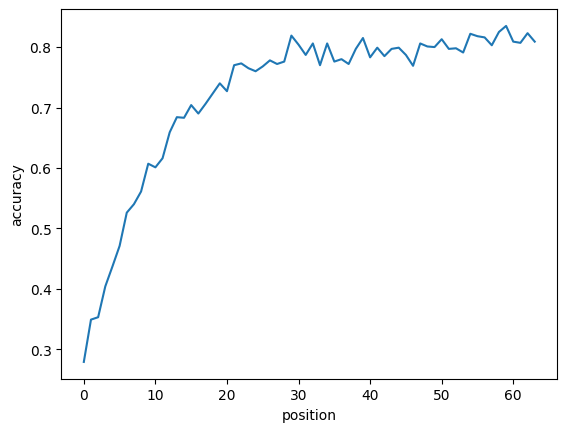

In [248]:
# TODO
import matplotlib.pyplot as plt

def per_position_accuracy(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    s = torch.zeros(SEQ_LEN)
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        s += (model_ans == y).sum(dim=1).cpu()

        total += y.shape[1]
    
    accuracies = [acc.item() for acc in (s / total)]
    print(["{0:0.2f}".format(acc) for acc in accuracies])
    
    plt.plot(accuracies)
    plt.ylabel("accuracy")
    plt.xlabel("position")
    plt.show()


per_position_accuracy(model, TEST_LOADER)

We can see, that after a couple of starting possitions, where accuracy is pretty low, at around position 20 or so model starts achieving accuracy of around 80%, meaning that model 'understood' the underlying markov chain and probabilities of transitions associated with every token. Now we can see, why accuracy stops at around 70% when testing model, it is because accuracy on first tokens is low, and then model caps at around 80% accuracy, which is the theoretical limit given the dataset specification.

# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

In [249]:
#TODO

MAX_NUM_LAYERS = 4

models = [Decoder(vocab_size=VOCAB_SIZE, 
            d_model=HIDDEN_DIM,
            d_ff=HIDDEN_FF,
            num_heads=NUM_HEADS,
            d_head=HEAD_DIM,
            num_layers=num_layers) for num_layers in range(MAX_NUM_LAYERS + 1)]

for (i, test_model) in enumerate(models):
    print("Model with:", i, "layers:")
    test_model.to(DEVICE)
    train(test_model, TRAIN_LOADER, TEST_LOADER, 10)
    print("")
    
    

Model with: 0 layers:
EPOCH 0 loss:2.2765774153455904 acc:0.2785
EPOCH 1 loss:2.181509844864471 acc:0.2785
EPOCH 2 loss:2.178001071833357 acc:0.2785
EPOCH 3 loss:2.1766355792178382 acc:0.2785
EPOCH 4 loss:2.175951713248144 acc:0.2785
EPOCH 5 loss:2.1755999522873117 acc:0.2785
EPOCH 6 loss:2.1754145863689955 acc:0.2785
EPOCH 7 loss:2.175314260434501 acc:0.2785
EPOCH 8 loss:2.175258558007735 acc:0.2785
EPOCH 9 loss:2.1752269328395024 acc:0.2785

Model with: 1 layers:
EPOCH 0 loss:2.1961259570302842 acc:0.2837
EPOCH 1 loss:2.1042128786256042 acc:0.3277
EPOCH 2 loss:2.0069719311557237 acc:0.3348
EPOCH 3 loss:1.978188321560244 acc:0.3395
EPOCH 4 loss:1.9563453499274919 acc:0.3450
EPOCH 5 loss:1.9352734179436406 acc:0.3498
EPOCH 6 loss:1.9148436226422274 acc:0.3537
EPOCH 7 loss:1.8944362462321414 acc:0.3577
EPOCH 8 loss:1.8723827857005446 acc:0.3597
EPOCH 9 loss:1.8486906290054321 acc:0.3633

Model with: 2 layers:
EPOCH 0 loss:2.1761306388468684 acc:0.2895
EPOCH 1 loss:2.0237032552308674 acc

We can see, that although they learn slower, models with 2 and 3 layers eventually get the same accuracy as a model with 4 layers.

In [250]:
MAX_NUM_LAYERS = 4
POSITIONAL = False

models = [Decoder(vocab_size=VOCAB_SIZE, 
            d_model=HIDDEN_DIM,
            d_ff=HIDDEN_FF,
            num_heads=NUM_HEADS,
            d_head=HEAD_DIM,
            num_layers=num_layers) for num_layers in range(MAX_NUM_LAYERS + 1)]

for (i, test_model) in enumerate(models):
    print("Model with:", i, "layers:")
    test_model.to(DEVICE)
    train(test_model, TRAIN_LOADER, TEST_LOADER, 10)
    print("")

Model with: 0 layers:
EPOCH 0 loss:2.262604499165016 acc:0.2785
EPOCH 1 loss:2.1761613193946547 acc:0.2785
EPOCH 2 loss:2.1759092294717135 acc:0.2785
EPOCH 3 loss:2.175989096677756 acc:0.2785
EPOCH 4 loss:2.176039744027053 acc:0.2785
EPOCH 5 loss:2.1760759564894663 acc:0.2785
EPOCH 6 loss:2.176103296159189 acc:0.2785
EPOCH 7 loss:2.176124735723568 acc:0.2785
EPOCH 8 loss:2.1761420105077045 acc:0.2785
EPOCH 9 loss:2.1761561164373084 acc:0.2785

Model with: 1 layers:
EPOCH 0 loss:2.184353716765778 acc:0.2811
EPOCH 1 loss:2.1482986317405217 acc:0.2833
EPOCH 2 loss:2.138398306279243 acc:0.2837
EPOCH 3 loss:2.132202359694469 acc:0.2838
EPOCH 4 loss:2.127476855169369 acc:0.2847
EPOCH 5 loss:2.123144859000097 acc:0.2864
EPOCH 6 loss:2.1185978424700003 acc:0.2869
EPOCH 7 loss:2.113424639158611 acc:0.2881
EPOCH 8 loss:2.1068899480602408 acc:0.2885
EPOCH 9 loss:2.0980290823344943 acc:0.2885

Model with: 2 layers:
EPOCH 0 loss:2.172699327710309 acc:0.2870
EPOCH 1 loss:2.02417759804786 acc:0.3472


We can clearly see, that model without positional encoding takes longer to learn in each case, but in case of 4 layer it manages to achieve around 70% accuracy mark, that version with positional encoding enabled stops at.

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [251]:
# TODO
POSITIONAL = True

def generate(model, choice_func, start_seq):
    model.eval()

    res_seq = start_seq.copy()
    for _ in range(SEQ_LEN - len(start_seq)):
        x = torch.Tensor(res_seq).long().to(DEVICE).unsqueeze(1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))
        pred = choice_func(dist)
        res_seq.append(pred[-1][0].item())

    return res_seq

def efficient_generate(model, choice_func, start_seq):
    model.eval()

    res_seq = start_seq.copy()
    x = torch.Tensor(res_seq).long().to(DEVICE).unsqueeze(1)
    dist, cache = model(x, model.get_empty_cache(1))
    pred = choice_func(dist)
    res_seq.append(pred[-1][0].item())
    off = len(start_seq)
    for _ in range(SEQ_LEN - len(res_seq)):
        x = torch.Tensor([res_seq[-1]]).long().to(DEVICE).unsqueeze(1)
        dist, cache = model(x, cache, offset = off)
        pred = choice_func(dist)
        res_seq.append(pred[0][0].item())
        off += 1

    return res_seq


s = [0,1,2, 0, 1, 2]
non_efficient_most_probable = generate(model, take_most_probable, s)


efficient_most_probable = efficient_generate(model, take_most_probable, s)
efficient_sample = efficient_generate(model, take_sample, s)


assert non_efficient_most_probable == efficient_most_probable
print(efficient_most_probable)
print(efficient_sample)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
[0, 1, 2, 0, 1, 2, 3, 9, 8, 4, 5, 7, 8, 9, 8, 4, 5, 7, 1, 2, 0, 4, 5, 7, 1, 2, 0, 1, 2, 3, 9, 8, 4, 6, 7, 1, 2, 3, 9, 8, 4, 6, 3, 9, 8, 4, 6, 3, 9, 8, 4, 6, 3, 9, 8, 4, 6, 3, 9, 8, 9, 0, 1, 2]


Here we can see, that efficient generation with caching enabled generates the same sequence, as the non-efficient method, when given the same startin sequence (and using most_probable function choice). We can also see, that althoug model can see the pattern (which is evident during taking most probable outcome), while sampling, once it goes out of the pattern it has trouble to come back and it essentially produces random noice. Below are the outputs of two sampling methods for different starting sequences. We can also see, that models definitely spots a simple patter after only 6 tokens.

In [255]:
sequences = [
    [0],
    [0,1,1,1,1,1,1,1,1],
    [0, 1, 2, 3, 2, 1, 0 ,1, 2, 3, 2, 1, 0 ,1, 2, 3, 2, 1, 0],
    [0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1, 0],
]

for s in sequences:
    non_efficient_most_probable = generate(model, take_most_probable, s)
    efficient_most_probable = efficient_generate(model, take_most_probable, s)
    efficient_sample = efficient_generate(model, take_sample, s)
    # This asser checks, whether cachine implementation is correct
    assert non_efficient_most_probable == efficient_most_probable
    print(efficient_most_probable)
    print(efficient_sample)
    print()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3]
[0, 9, 2, 1, 0, 9, 2, 3, 3, 3, 4, 5, 7, 8, 9, 2, 1, 0, 9, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 7, 8, 9, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 7, 8, 9, 2, 1, 2]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 9, 8, 9, 8, 9, 8, 4, 2, 0, 1, 1, 2, 3, 3, 3, 3, 4, 2, 0, 4, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 4, 2, 0, 4, 6, 2, 0, 4, 2, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 5, 6]

[0, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2,

## Attention visualizations (optional)